In [1]:
from data_augmentator import Data_Augmentator
from BKG_Dataholder import BKG_dataholder
from Coll_Data_Aug import Coll_Data_Augmentator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


import os
import json
import time,datetime
import tables as t

%matplotlib inline

In [2]:
BEAM_PATH = "/home/mirksonius/Desktop/Fill_info/beam/"
COLLIMATOR_PATH = "/home/mirksonius/Desktop/Fill_info/collimators/"
VACUUM_PATH = "/home/mirksonius/Desktop/Fill_info/vacuum/"
FILL_PATH = "/home/mirksonius/Desktop/22_fills/"
FILL_NUMBER = 8068

vac_vars = [
    "VGI.183.1L5.X.PR",
    "VGI.183.1R5.X.PR",
    "VGI.220.1L5.X.PR",
    "VGI.220.1R5.X.PR"]

In [3]:
bkg = BKG_dataholder(fill_path = FILL_PATH,
                                    fill_number = FILL_NUMBER,
                                    beam_path = BEAM_PATH,
                                   collimator_path = COLLIMATOR_PATH,
                                   vacuum_path= VACUUM_PATH  
                                   )
bkg.get_beam_data()
bkg.get_fill_data()
bkg.vacuum_variables = vac_vars
bkg.get_vacuum_data()
bkg.get_collimator_data()



Opening file 8068_356436_2207291941_2207291941.hd5
File 8068_356436_2207291941_2207291941.hd5 starts at 2022-07-29 19:41:26 and ends at 2022-07-29 19:42:56
Opening file 8068_356438_2207292019_2207292034.hd5
File 8068_356438_2207292019_2207292034.hd5 starts at 2022-07-29 20:24:35 and ends at 2022-07-29 20:35:07
Opening file 8068_356443_2207292034_2207292133.hd5
File 8068_356443_2207292034_2207292133.hd5 starts at 2022-07-29 20:35:08 and ends at 2022-07-29 21:33:25
Opening file 8068_356444_2207292133_2207292155.hd5
File 8068_356444_2207292133_2207292155.hd5 starts at 2022-07-29 21:33:27 and ends at 2022-07-29 21:58:51
Opening file 8068_356445_2207292155_2207292159.hd5
File 8068_356445_2207292155_2207292159.hd5 starts at 2022-07-29 21:58:52 and ends at 2022-07-29 22:01:57
Opening file 8068_356446_2207292159_2207300202.hd5
File 8068_356446_2207292159_2207300202.hd5 starts at 2022-07-29 22:02:00 and ends at 2022-07-30 02:05:47


In [4]:
aug = Data_Augmentator(
    bkg_dh = bkg,
    #vac_vars = vac_vars
    )

In [5]:
df = aug.complete_data
df.tail()

,timestamp,lumi,plusz,minusz,VGI.183.1L5.X.PR,VGI.183.1R5.X.PR,VGI.220.1L5.X.PR,VGI.220.1R5.X.PR,beam_mode_cypher,beam_mode
14047,1.659147e+09,0.0,0.0,0.0,2.264498e-11,1.599999e-12,1.355261e-10,1.368041e-10,11.0,STABLE
14048,1.659147e+09,0.0,0.0,0.0,2.262392e-11,1.599999e-12,1.352034e-10,1.369556e-10,11.0,STABLE
14049,1.659147e+09,0.0,0.0,0.0,2.260287e-11,1.599999e-12,1.348808e-10,1.371072e-10,11.0,STABLE
14050,1.659147e+09,0.0,0.0,0.0,2.256077e-11,1.599999e-12,1.342355e-10,1.374102e-10,13.0,BEAMDUMP
14051,1.659147e+09,0.0,0.0,0.0,2.253972e-11,1.599999e-12,1.339129e-10,1.375617e-10,13.0,BEAMDUMP


In [6]:
df_stable = df.loc[df.beam_mode == "STABLE"]

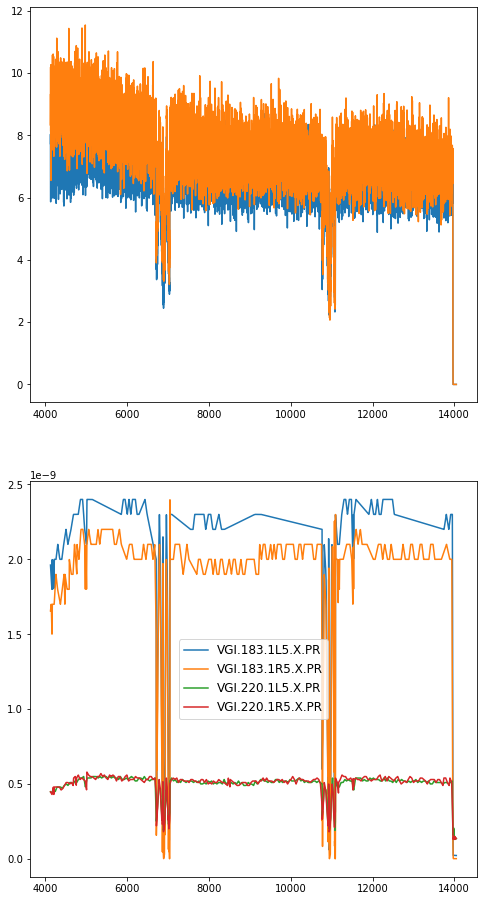

In [7]:
frame,fig = plt.subplots(2,1, figsize =(8,16))
fig[0].plot(df_stable.plusz)
fig[0].plot(df_stable.minusz)

for var in aug.vacuum_variables:
    fig[1].plot(df_stable[var],label = var)

fig[1].legend(fontsize = 12)

7611.70947265625


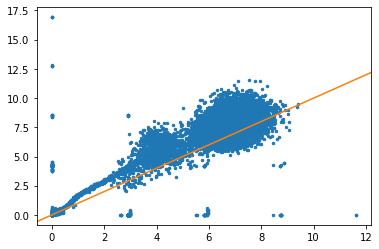

In [8]:
plt.scatter(aug.plusz,aug.minusz,s = 6)
plt.axline((0,0),slope = 1,color = "tab:orange")
print(aug.lumi.max())

In [9]:
biggest = 0
smallest = 1e308
for var in aug.vacuum_variables:
    M = aug.vacuum_data[var].max() 
    m = aug.vacuum_data[var].min()
    if M > biggest:
        biggest = M
    if m<smallest:
        smallest = m
    print(biggest,smallest)            

2.3999968679078165e-09 8.101312394037947e-12
2.3999968679078165e-09 3.620526295711333e-13
2.3999968679078165e-09 3.620526295711333e-13
2.3999968679078165e-09 3.620526295711333e-13


In [10]:
import Pretty_Graphs as pg


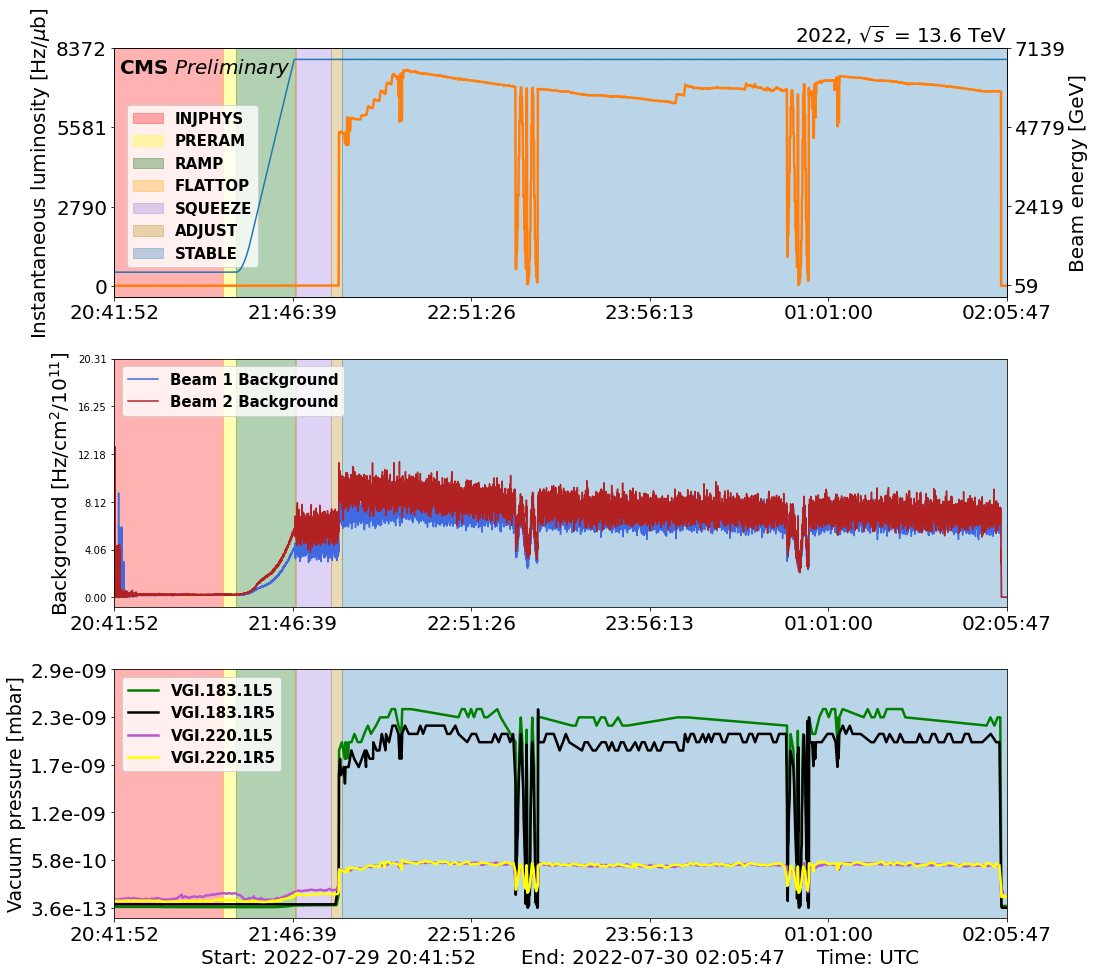

In [11]:
art = pg.Artist(aug)

start = aug.complete_data[
    aug.complete_data.beam_mode == "INJPROB"
]["timestamp"].iloc[-1]

art.make_plots(
    path = "plots/"
    start_plot = start
)

In [14]:
#Getting ramp data
ramp_data = aug.complete_data.loc[
    aug.complete_data.beam_mode == "RAMP"
]

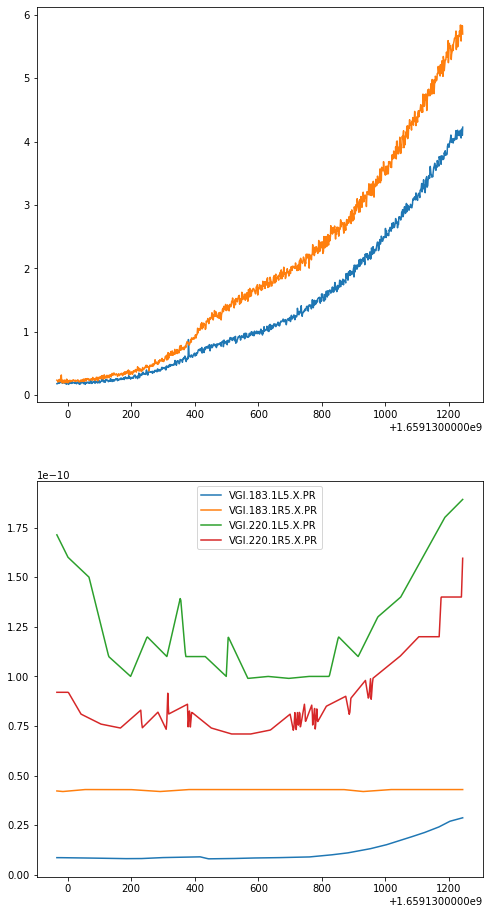

In [15]:
frame, fig = plt.subplots(2,1,figsize = (8,16))
fig[0].plot(ramp_data.timestamp,ramp_data.plusz)
fig[0].plot(ramp_data.timestamp,ramp_data.minusz)

for var in aug.vacuum_variables:
    fig[1].plot(ramp_data.timestamp,ramp_data[var],label = var)

fig[1].legend()